<div style="border:solid Chocolate 2px; padding: 40px">

Привет Максим, меня зовут Саша Атаков. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех👍:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет🤔: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка❌:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<b><font color='orange'>Вот тебе полезная ссылка, вдруг подчерпнешь что-то новое для себя):</font></b>

* О логистической регрессии: https://habr.com/ru/company/io/blog/265007/
* Ну и случайный лес: https://alexanderdyakonov.wordpress.com/2016/11/14/%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D1%8B%D0%B9-%D0%BB%D0%B5%D1%81-random-forest/
* О dummy model - https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
* Более подробно о dummy model - https://www.geeksforgeeks.org/ml-dummy-classifiers-using-sklearn/
    
<b><font color='orange'>Общее впечатление</font></b>
* Большое спасибо за проделанную работу. Видно, что ты отлично освоил тему.
* Отлично, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* В конце прописал свой комментарий по всему проекту, ознакомься с ним, пожалуйста)
* С радостью отвечу на твои вопросы, касательно выданной тебе темы, если они есть. Жду новую версию проекта.)

# Рекомендация тарифов

## Цель
Построит модель классификации подбора тарифов, для пользователей "Мегалайн" использующих архивные тарифы<br>

Постройте модель с максимально большим значением accuracy<br>
Минимальная доля правильных ответов 0.75<br>
Проверьте accuracy на тестовой выборке самостоятельно<br>

### Описание данных

сalls — количество звонков<br>
minutes — суммарная длительность звонков в минутах<br>
messages — количество sms-сообщений<br>
mb_used — израсходованный интернет-трафик в Мб<br>
is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)<br>

<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
За цель и описание данных - отдельный лайк, мое почтение)
</div>

## Откройте и изучите файл

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats as st
import matplotlib.pyplot as plt
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None 

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.dummy import DummyClassifier

<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
Хороший шаг - импортировать все необходимые библиотеки перед работой с проектом, ведь так ты точно не запутаешься в том, какие библиотеки ты уже импортировал, а какие стоит добавить. Молодец!
</div>

In [3]:
try:
    data = pd.read_csv('/datasets/users_behavior.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
Дополнительный путь для загрузки данных - осторожно, круто)
</div>

In [4]:
def data_info(data):
    display(data.head(10))
    print('#' * 55)
    data.info()
    print('#' * 55)
    display(data.isna().sum())
    
    
data_info(data)   

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


#######################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
#######################################################


calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
Грамотный анализ данных
</div>

приведём значение типа данных в столбце звонки и сообщения к целому числу

In [5]:
data['calls'] = data['calls'].astype('int32')
data['messages'] = data['messages'].astype('int32')

In [6]:
data.dtypes

calls         int32
minutes     float64
messages      int32
mb_used     float64
is_ultra      int64
dtype: object

In [7]:
# остальные столбцы с типом float64 сделаем float32 
for i in data.select_dtypes('float64'):
    data[i] = data[i].astype('float32')


In [8]:
#посмотрим как распределены тарифы
s = data['is_ultra'].value_counts(normalize=True)
print('Тариф "Ультра" {:,.2%}'.format(s[1])) 
print('Тариф "Смарт" {:,.2%}'.format(s[0])) 

Тариф "Ультра" 30.65%
Тариф "Смарт" 69.35%


### Вывод 
Данные готовы к созданию и обучению модели классификации подбора тарифа<br>
Представлены два тарифа<br>
Тариф "Ультра" 30.65%<br>
Тариф "Смарт" 69.35%<br>



<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
Хорошо сработано
</div>

## Разбьём данные на выборки

In [9]:
features = data.drop('is_ultra', axis=1)
target = data['is_ultra']
# features = StandardScaler().fit_transform(features)


<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
За использование стандартизации - снимаю шляпу, это тема следующих уроков, а ты уже ее применяешь, молодец
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка❌:</b> 
    
Однако стандартизацию нужно осуществлять по следующему алгоритму:
* Делим данные на выборки (train/valid/test)
* Обучаем scaler на train
* Преобразуем все выборки методом transform
* Проверяем как сработано
    
Применив такой алгоритм, у нас не произойдет утечка в данных, ведь стандартизация берет среднее и дисперсию по той выборке, на которой обучается и преобразует под тот манер, на каких данных обучилась. В твоем случае у нас в train выборку попали среднее и дисперсия от будущих valid и test значений, поэтому лучще все делать по алгоритму)
</div>

<div style="background: #2A57DB; padding: 20px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='#F3F5F2'><u><b></b></u></font>
    <br/>
    <font color='#F3F5F2'>Поправил<br>
        не понял относительно проверки – "как сработано"?<br>
        вроде мы сперва оцениваем маштабы данных<br>
        если они разные проводим стандартизацию<br>
</font>
</div>

<div class="alert alert-block alert-success">
<b>Успех👍 V2:</b> 
    
"Проверяем как сработано" - это просмотреть некоторые данные из выборок, чтобы проверить работу стандартизации. А по поводу оценивания масштаба данных - это конечно), но после того, как мы точно убедиль в том, что нам нужна стандартизация, то применяем алгоритм выше)
</div>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    train_size=0.7, 
                                                    random_state=42,
                                                    stratify=target)

print(f"Количество строк в y_train по классам: {np.bincount(y_train)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_train по классам: [1560  689]
Количество строк в y_test по классам: [669 296]


In [11]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test,
                                                    train_size=0.5, 
                                                    random_state=42,
                                                    stratify=y_test)

print(f"Количество строк в y_valid по классам: {np.bincount(y_valid)}")
print(f"Количество строк в y_test по классам: {np.bincount(y_test)}")

Количество строк в y_valid по классам: [334 148]
Количество строк в y_test по классам: [335 148]


In [12]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


### Вывод
Данные разбиты на три стратифицированные выборки<br>
70% от всех данных тренировочная <br>
15% валидационная выборка<br>
15% тестовая выборка<br>

Из-за разного масштаба данных все признаки выборок были масштабированны <br>

<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
А так, выборки реализованы, круто!
</div>

## Исследуйте модели

In [13]:
final_result = ({'DecisionTreeClassifier': [],
                'RandomForestClassifier': [],
                'LogisticRegression': []})


### DecisionTreeClassifier

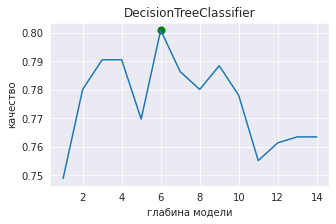

Лучший результат accuracy_score 80.08%
Глубина дерева лучшего результата равна 6


In [14]:
# модель дерево решений
# параметры подобраны в ручную кроме высоты дерева
result_list_DT = []
best_model_DT = None
best_result = 0

for depth in range(1, 15):
    model =(DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=8,
                                   criterion='gini', splitter='best', min_samples_split=8)) # обучим модель с заданной глубиной дерева
    model.fit(X_train, y_train) 
    predictions = model.predict(X_valid) # получили предсказания модели
    result = accuracy_score(y_valid, predictions) # посчитали качество модели
    result_list_DT.append(result)
    if result > best_result:
        max_depth = depth
        best_model_DT = model
        best_result = result

final_result['DecisionTreeClassifier'].append(best_result)
        
sns.set_style("darkgrid")  
plt.figure(figsize=(5,3))
result_list_DT = pd.Series(result_list_DT, index=np.arange(1,15))
(sns.lineplot(data = result_list_DT).
         set(title='DecisionTreeClassifier', 
          xlabel='глабина модели', ylabel='качество'));

plt.scatter(x=[max_depth], y=[best_result], color='green', s=50, marker='o')
plt.show()

print(f'Лучший результат accuracy_score {best_result:,.2%}')
print(f'Глубина дерева лучшего результата равна {max_depth}')


<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
Прекрасная реализация обучения дерева и визиулизация графика его значений, снимаю шляпу
</div>

### RandomForestClassifier 
для подбора гиперпараметров воспользуемся методом RandomizedSearchCV

<div class="alert alert-block alert-info">
<b>Совет🤔: </b> 
    
Лучше импортировать все перед проектом, так ты точно не запутаешься в том, что ты импортировал, а что нет
</div>

<div style="background: #2A57DB; padding: 20px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='#F3F5F2'><u><b></b></u></font>
    <br/>
    <font color='#F3F5F2'>Поправил<br>
        <br>
        
</font>
</div>

<div class="alert alert-block alert-success">
<b>Успех👍 V2:</b> 
    
Круто)
</div>

In [15]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(2, 120, 3, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 8, 10, 14],
               'n_estimators': list(np.linspace(5, 120, 5, dtype = int))}

clf = RandomForestClassifier();

model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 0, random_state= 12345, n_jobs = -1)


model.fit(X_train,y_train)
model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=61, min_samples_leaf=8,
                       min_samples_split=14, n_estimators=91)

<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
использовать randomsearch - похвально, ты и правда прекрасно знаешь материал
</div>

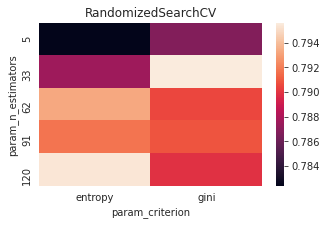

In [16]:
table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', 
                       columns='param_criterion')

plt.figure(figsize=(5,3))     
sns.heatmap(table).set(title='RandomizedSearchCV');


<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
хорошая визуализация результатов randomsearch
</div>

In [17]:
model = (RandomForestClassifier(random_state=12345, max_depth=120, max_features='sqrt', 
                                min_samples_leaf=8, min_samples_split=5, n_estimators=91, criterion='entropy')) 
model.fit(X_train,y_train)
result = model.score(X_valid, y_valid)
print(f'Результат применения метода RandomForestClassifier {result:,.3%}')

Результат применения метода RandomForestClassifier 79.668%


In [18]:
model = (RandomForestClassifier(random_state=12345, max_depth=120, max_features='sqrt', 
                                min_samples_leaf=8, min_samples_split=8, n_estimators=120, criterion='gini')) 
model.fit(X_train,y_train)
result = model.score(X_valid, y_valid)
print(f'Результат применения метода RandomForestClassifier {result:,.3%}')

Результат применения метода RandomForestClassifier 79.876%


Результаты подбора параметров методом RandomizedSearchCV неудовлетворительные<br>
Воспользуемся циклом для определения количества деревьев<br>
Остальные параметры возьмем из DecisionTreeClassifier<br>

In [19]:
# модель с заданным количеством деревьев
# экспериментально было установлено, что после 100 деревьев качество 
# модели не меняется наглядно демонстрируя закон больших чисел
result_list_FD = []
best_model_FD = None
best_result = 0

for est in range(1, 100):
    model = (RandomForestClassifier(random_state=12345, n_estimators=est, 
                                    criterion='gini',  max_depth=6, min_samples_leaf=8, 
                                    min_samples_split=8)) 
    model.fit(X_train, y_train) # модель на тренировочной выборке
    result = model.score(X_valid, y_valid) # качество модели на валидационной выборке
    result_list_FD.append(result)
    if result > best_result:
        number_est = est
        best_model_FD = model   # лучшая модель
        best_result = result # наилучшее значение метрики accuracy на валидационных данных
 
final_result['RandomForestClassifier'].append(best_result)

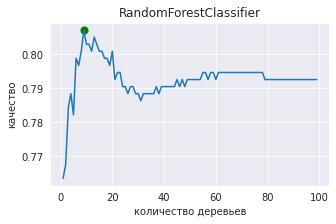

Лучший результат accuracy_score 80.71%
Лучшее качество модели с количеством деревьев 9


In [20]:
sns.set_style("darkgrid")  
plt.figure(figsize=(5,3))
plt.subplot().set(xlabel='количество деревьев', ylabel='качество')
result_list_FD = pd.Series(result_list_FD, index=np.arange(1,100))
sns.lineplot(data = result_list_FD).set(title='RandomForestClassifier');
plt.scatter(x=[number_est], y=[best_result], color='green', s=50, marker='o')
plt.show()

print(f'Лучший результат accuracy_score {best_result:,.2%}')
print(f'Лучшее качество модели с количеством деревьев {number_est}')

<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
Старые добрые циклы помогают). Так держать
</div>

### LogisticRegression

In [21]:
param_grid = ({'C':[0.2, 0.4, 0.8, 1.6, 3.2],'solver' : ['lbfgs'], 'max_iter' : [10000]})

clf = (GridSearchCV(LogisticRegression(random_state = 12345), param_grid, cv = 5, verbose = 0, n_jobs = -1))

best_model = clf.fit(X_train, y_train)
print(best_model.best_estimator_)

result = best_model.score(X_valid, y_valid)
print(f'Лучший результат accuracy_score {result:,.2%}')

final_result['LogisticRegression'].append(result)

LogisticRegression(C=0.4, max_iter=10000, random_state=12345)
Лучший результат accuracy_score 73.44%


<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
А тут вообще gridsearch, прекрасно, ты меня очень порадовал на протяжении всего проекта. Хорошее владение материалом, правда
</div>

In [22]:
for i in final_result:
    print('Качество модели {} составляет {:,.2%}'.format(i, *final_result[i]))

Качество модели DecisionTreeClassifier составляет 80.08%
Качество модели RandomForestClassifier составляет 80.71%
Качество модели LogisticRegression составляет 73.44%


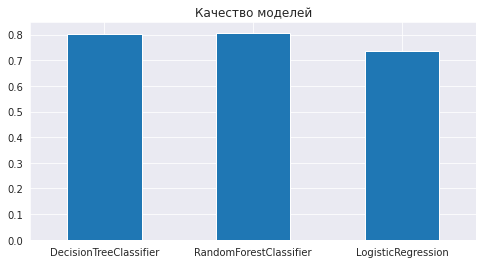

In [23]:
final_result = pd.DataFrame(final_result)
final_result.T.plot.bar(figsize=(8, 4), legend=False).set(title='Качество моделей');
plt.xticks(rotation=0)
plt.show()

### Вывод
Модель классификации RandomForestClassifier показала лучшие показатели с результатом 80.71% <br>
и количеством деревьев равное 9<br>

Модель DecisionTreeClassifier справилась с с показателем 80.08% <br>
и глубиной дерева равной 6<br>

LogisticRegression показала худший результат с показателем 73.44% <br>

<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
Согласен с тобой, лес лучше всех оказался
</div>

## Проверьте модель на тестовой выборке

<div class="alert alert-block alert-info">
<b>Совет🤔:</b> 

На тестовой выборке нужно проверять только свою лучшую выборку, так как во время реального проекта у нас не будет ни времени, не средств, чтобы проверять все модели на тестовых данных. Советую оставить на этапе тестирования только лучшую модель. Тем более в следующих проектах за это могут красный маркер поставить, а нам это не нужно, верно?)
</div>

<div style="background: #2A57DB; padding: 20px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='#F3F5F2'><u><b></b></u></font>
    <br/>
    <font color='#F3F5F2'>Поправил<br>
        <br>
        
</font>
</div>

<div class="alert alert-block alert-success">
<b>Успех👍 V2:</b> 
    
Вот теперь тестирование выглядит как надо)
</div>

In [24]:
result_FD = best_model_FD.score(X_test, y_test) # RandomForestClassifier

print(f'Качество модели RandomForestClassifier равно {result_FD:,.2%}')


Качество модели RandomForestClassifier равно 82.82%


### Вывод
Проверка модел на тестовой выборке показала результат немного лучше, чем на <br>
валидационной выборке<br>

## (бонус) Проверьте модели на адекватность

In [25]:
strategies = ['most_frequent', 'stratified', 'uniform', 'constant']
  
test_scores = []
for s in strategies:
    if s =='constant':
        dclf = DummyClassifier(strategy = s, random_state = 0, constant = 1)
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0)
    dclf.fit(X_train, y_train)
    score = dclf.score(X_test, y_test)
    test_scores.append({s : score})

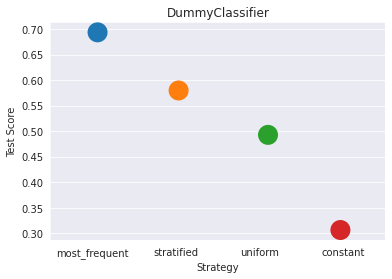

Стратегия most_frequent качество предсказания 69.36%
Стратегия stratified качество предсказания 57.97%
Стратегия uniform качество предсказания 49.28%
Стратегия constant качество предсказания 30.64%


In [26]:
plt.figure(figsize=(6,4))
ax = sns.stripplot( data=pd.DataFrame(test_scores), s=20, marker='o');
ax.set(xlabel ='Strategy', ylabel ='Test Score', title ='DummyClassifier')
plt.show()

for i in test_scores:
    print('Стратегия {} качество предсказания {:,.2%}'.format(*i.keys(), *i.values()))

<div class="alert alert-block alert-info">
<b>Совет🤔:</b> 

Проверка на адекватность делается по другому - мы обучаем дефолтную модель, обучаем ее и смотрим на ее ответы. Брать в качестве проверки на адекватность рандомайзер 0 и 1 не поможет проверить адекватность, ведь чаще всего такое распределение дает нам просто нормальное распределение 0 и 1, то есть 0.5. Лучше проверить на dummy_models (выше приложил ссылку)
</div>

<div style="background: #2A57DB; padding: 20px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='#F3F5F2'><u><b></b></u></font>
    <br/>
    <font color='#F3F5F2'>Поправил<br>
        <br>
        
</font>
</div>

<div class="alert alert-block alert-success">
<b>Успех👍 V2:</b> 
    
Да, теперь все абсолютно верно, ты реализовал прекрасно dummy model, особенно красиво вышел график, мое почтение)
</div>

### Вывод
Все модели классификации обученные с использованием DummyClassifier<br>
Показали точность классификации значительно ниже моделей:  <br>
RandomForestClassifier 80.71%<br>
DecisionTreeClassifier 80.08%<br>
LogisticRegression 73.44%<br>
Наши модели адекватны с высоким качеством классификации<br>

## Вывод финал

Для обучения моделей классификации данные пользователей Тарифов «Ультра» и «Смарт»<br>
были разбиты на три стратифицированные выборки в пропорциях <br>
70% от всех данных тренировочная<br>
15% валидационная выборка<br>
15% тестовая выборка<br>
и масштабированы для улучшения восприятия моделей и расширения диапазона характеристик<br>

Были обучены три модели и показали качество на валидационной выборке<br>
RandomForestClassifier 80.71%<br>
DecisionTreeClassifier 80.08%<br>
LogisticRegression 73.44%<br>

Проведена проверка на адекватность с использованием фиктивного классификатора DummyClassifier<br>
Результаты проверки подтвердили актуальность наших моделей<br>

Цель достигнута <br>
Модель построенная с использованием RandomForestClassifier "best_model_FD" рекомендуем <br>
Для использования при классификации пользователей "Мегалайн" и рекомендации новых <br>
Тарифов «Ультра» и «Смарт» <br>
Точность модели на тестовых данных 82.82%<br>

<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
Да, вывод хороший
</div>

<div class="alert alert-block alert-info">
<b>Совет🤔:</b> 

Однако лучше к нему добавить действия и выводы с этапов анализа данных и деления на выборки, так будет цельнее
</div>

<div style="background: #2A57DB; padding: 20px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='#F3F5F2'><u><b></b></u></font>
    <br/>
    <font color='#F3F5F2'>Поправил<br>
        <br>
        
</font>
</div>

<div class="alert alert-block alert-success">
<b>Успех👍 V2:</b> 
    
Вывод реализован хорошо, так держать, мне все нравится)
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75


<div style="border:solid Chocolate 2px; padding: 40px">
    
<h2><b>Общий вывод по проекту</b></h2>
    
Ты очень постарался, спасибо тебе за такую работу!)

В ходе проекта были выполнены все этапы проекта, главная цель достигнута. Конечно присутствует ряд моментов, которые необходимо рассмотреть, но ничего страшного, для это я здесь). Давай пройдемся по всем этапам твоего проекта чтобы понять, как ты справился:

- Есть момент со стандартизацией, просмотри его    
    
- Если хочешь и есть время, то пройдись по моим советам (особенно по тестированию)
    
Работа хорошая, но нужно чуть-чуть поработать над ним. Удачи

<div style="background: #2A57DB; padding: 20px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='#F3F5F2'><u><b></b></u></font>
    <br/>
    <font color='#F3F5F2'>Все замечания исправлены<br>
        Спасибо большое за проверку<br>
        С наступающим Новым Годом 👍🕺<br>
        👾
        
</font>
</div>

<div class="alert alert-block alert-success">
<b>Успех👍 V2:</b> 
    
Огромное спасибо, тебя тоже с наступающим)
</div>

<div style="border:solid Chocolate 2px; padding: 40px">
    
<h2><b>Общий вывод по проекту V2</b></h2>
    
Проект принимается, с наступающим Новым годом)